###Importación Librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

###Importando Dataset de TELCO

In [4]:
df=pd.read_csv('./Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Información General

In [ ]:
#Mostramos la cantidad de filas y columnas que tiene el Dataset.
df.shape

(7043, 21)

In [ ]:
#Mostramos el tipo de dato que contiene cada columna.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Mostramos la cantidad de registros existentes por columna.
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [15]:
#Mostramos mas información del dataset.
df.info()
#La columna TotalCharges la pasamos a valor numérico.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Mostramos valores estadísticos. Solo se muestran las columnas que no tienen valores binarios.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Pivoteamos la tabla para observar mejor las estadísticas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
#Agarramos la columna MonthylCharges y evaluamos sus estadísticas.
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

###Gráficos

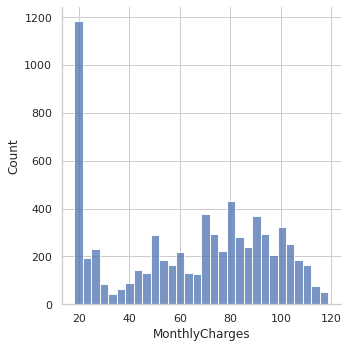

In [ ]:
#Observamos como se distribuye el Monto Mensual cobrado a los clientes.
sns.set_theme(style="whitegrid")
sns.displot(df.MonthlyCharges, kde=False, bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


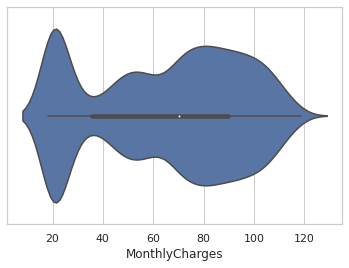

In [ ]:
#Mostramos la distribución del cargo mensual y su densidad.
sns.set_theme(style="whitegrid")
violinplot(df.MonthlyCharges, data=df.MonthlyCharges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


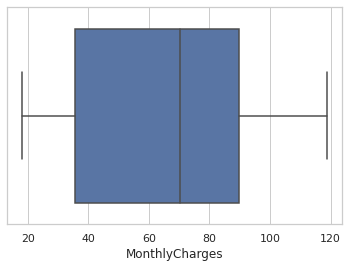

In [ ]:
#Observamos la distribución con un gráfico diferente.
sns.boxplot(df.MonthlyCharges, data=df)

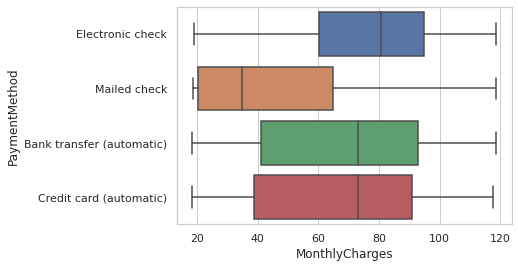

In [110]:
#Observamos como jugando con otras variables se enriquece mas la información obtenida.
sns.boxplot(data=df, x=df.MonthlyCharges, y=df.PaymentMethod)

## **Analisis Bivariado**

La columna CHURN solo tiene dos tipos de respuestas: Si y No. Esta información es sobre si los clientes decidieron abandonar el servicio. Lo que se buscará es encontrar una relación/motivo por el cual estos clientes deciden abandonar el servicio y esto se realizará a través de un analisis bivariado comparando el CHURN con otras variables del dataset.

**CHURN VS TOTAL CHARGES**

Conclusión:


1. Se observa una gran densidad de cargos totales menores a 2000. No existe diferencias entre clientes de distinto sexo ya que su comportamiento es similar.

In [16]:
churn_yes=df.Churn=='Yes'
churn_yes2=churn_yes.sum()
churn_no=df.Churn=='No'
churn_no2=churn_no.sum()

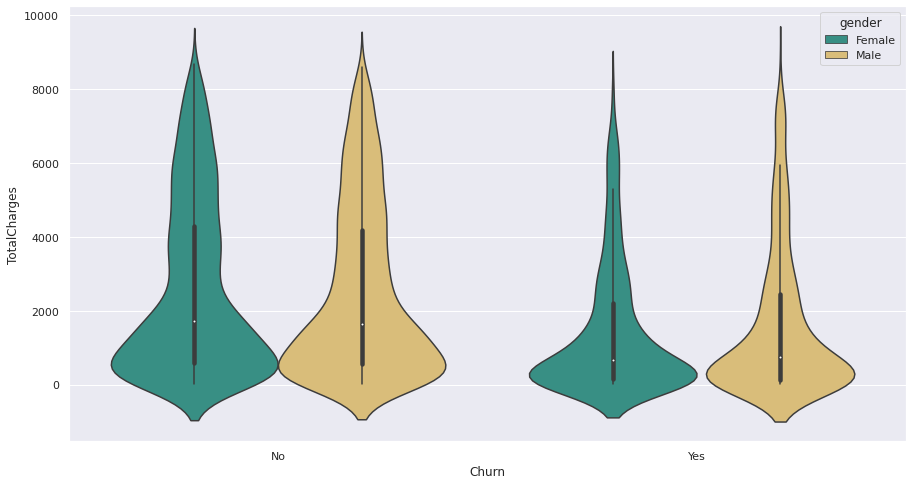

In [197]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Churn',y='TotalCharges',data=df,palette=['#2a9d8f','#e9c46a'], hue='gender')
plt.show()

**CHURN VS MONTHLY CHARGES**

Conclusión:

1. Se observa que una gran cantidad de clientes abandonó los servicios teniendo una tarifa superior a $60. Es interesante este punto para establecer alguna estrategia comercial distinta con este "segmento" de clientes.

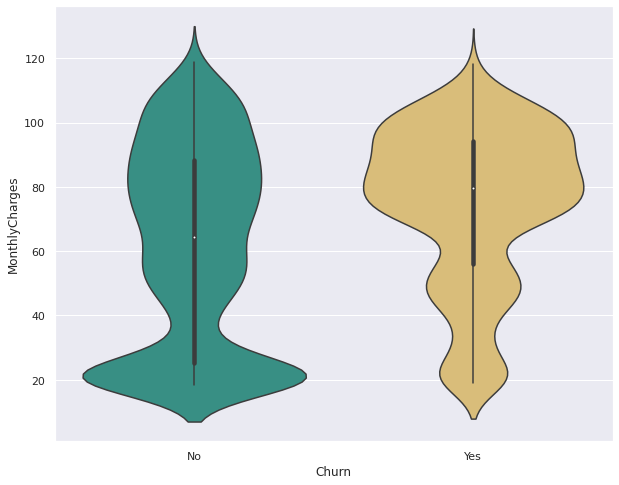

In [195]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Churn',y='MonthlyCharges',data=df,palette=['#2a9d8f','#e9c46a'], smoker='Churn')
plt.show()

**CHURN VS PAYMENT METHOD**

Conclusión:

1. Se observa que la vía de pago MAILED CHECK tiene un comportamiento distinto a los demás cuando aumenta el cargo mensual. A mayor cargo mensual menor deserción tiene.
2. La gran mayoría de los clientes que dieron de baja el servicio tienen vía de pago Electronic Check.

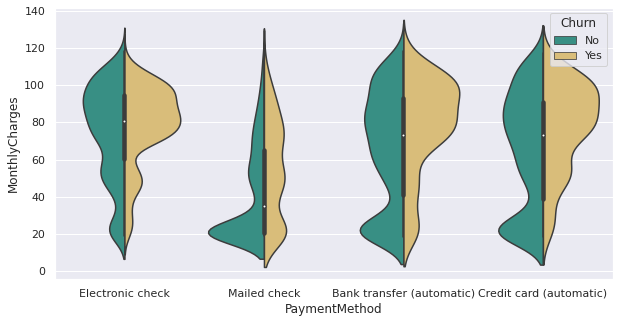

In [194]:
ax = sns.violinplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True, palette=['#2a9d8f','#e9c46a'])
sns.set(rc={'figure.figsize':(10,8)})

In [202]:
color_map = {"Yes": "#2a9d8f", "No": "#e9c46a"}
fig = px.histogram(df, x="Churn", color="PaymentMethod", barmode="group")
fig.update_layout(width=800, height=500, bargap=0.2)
fig.show()

**CHURN VS CONTRACT**

Conclusión:

1. Se observa que de los clientes que se dan de baja la gran mayoría tenía un contrato mes a mes.
2. A mayor temporalidad del contrato menor es la deserción.

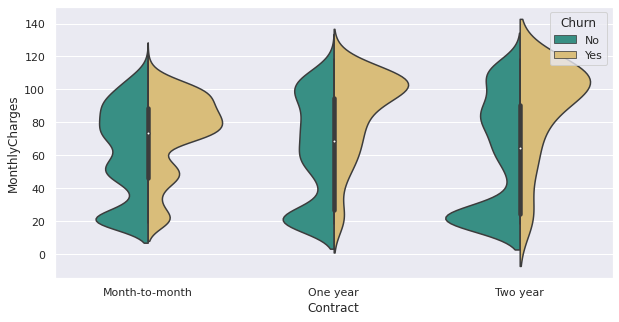

In [193]:
ax = sns.violinplot(x = 'Contract', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True, palette=['#2a9d8f','#e9c46a'])
sns.set(rc={'figure.figsize':(10,5)})

In [201]:
color_map = {"Yes": "#2a9d8f", "No": "#e9c46a"}
fig = px.histogram(df, x="Churn", color="Contract", barmode="group")
fig.update_layout(width=800, height=500, bargap=0.2)
fig.show()

**CHURN VS SENIOR CITIZEN (Adulto mayor a 65 años)**

Conclusión:

1. La gran mayoría de los clientes son menores a 65 años.
2. No se observa un abandono del servicio por rango etario.

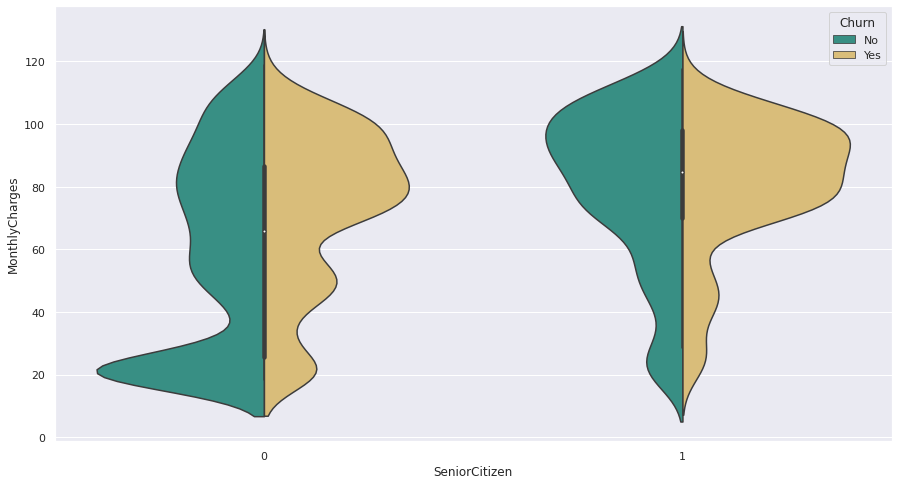

In [168]:
ax = sns.violinplot(x = 'SeniorCitizen', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True, palette=['#2a9d8f','#e9c46a'])
sns.set(rc={'figure.figsize':(15,8)})

In [205]:
color_map = {"Yes": "#2a9d8f", "No": "#e9c46a"}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="group")
fig.update_layout(width=800, height=500, bargap=0.2)
fig.show()

**CHURN VS INTERNET SERVICE**

Conclusión:

1. Se observa que el servicio mas caro es el Fiber Optic.
2. Los clientes que mas abandonan son aquellos que cuentan con Fiber Optic. 

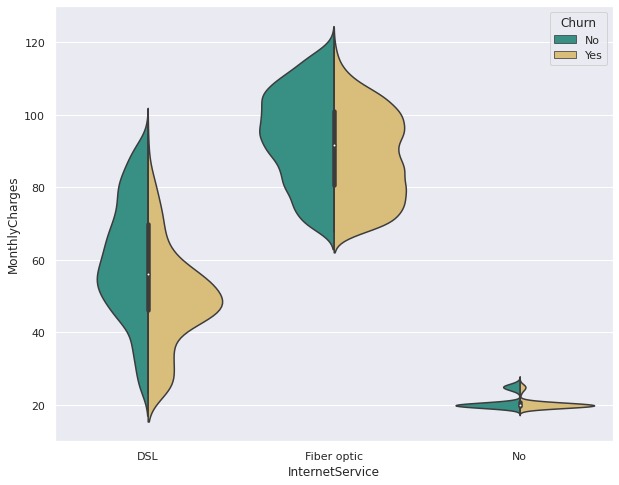

In [181]:
ax = sns.violinplot(x = 'InternetService', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True, palette=['#2a9d8f','#e9c46a'])
sns.set(rc={'figure.figsize':(10,5)})

In [208]:
color_map = {"Yes": "#2a9d8f", "No": "#e9c46a"}
fig = px.histogram(df, x="Churn", color="InternetService", barmode="group")
fig.update_layout(width=800, height=500, bargap=0.2)
fig.show()